In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read the Pharma Sector data 
df = pd.read_csv("SWIPES.csv")

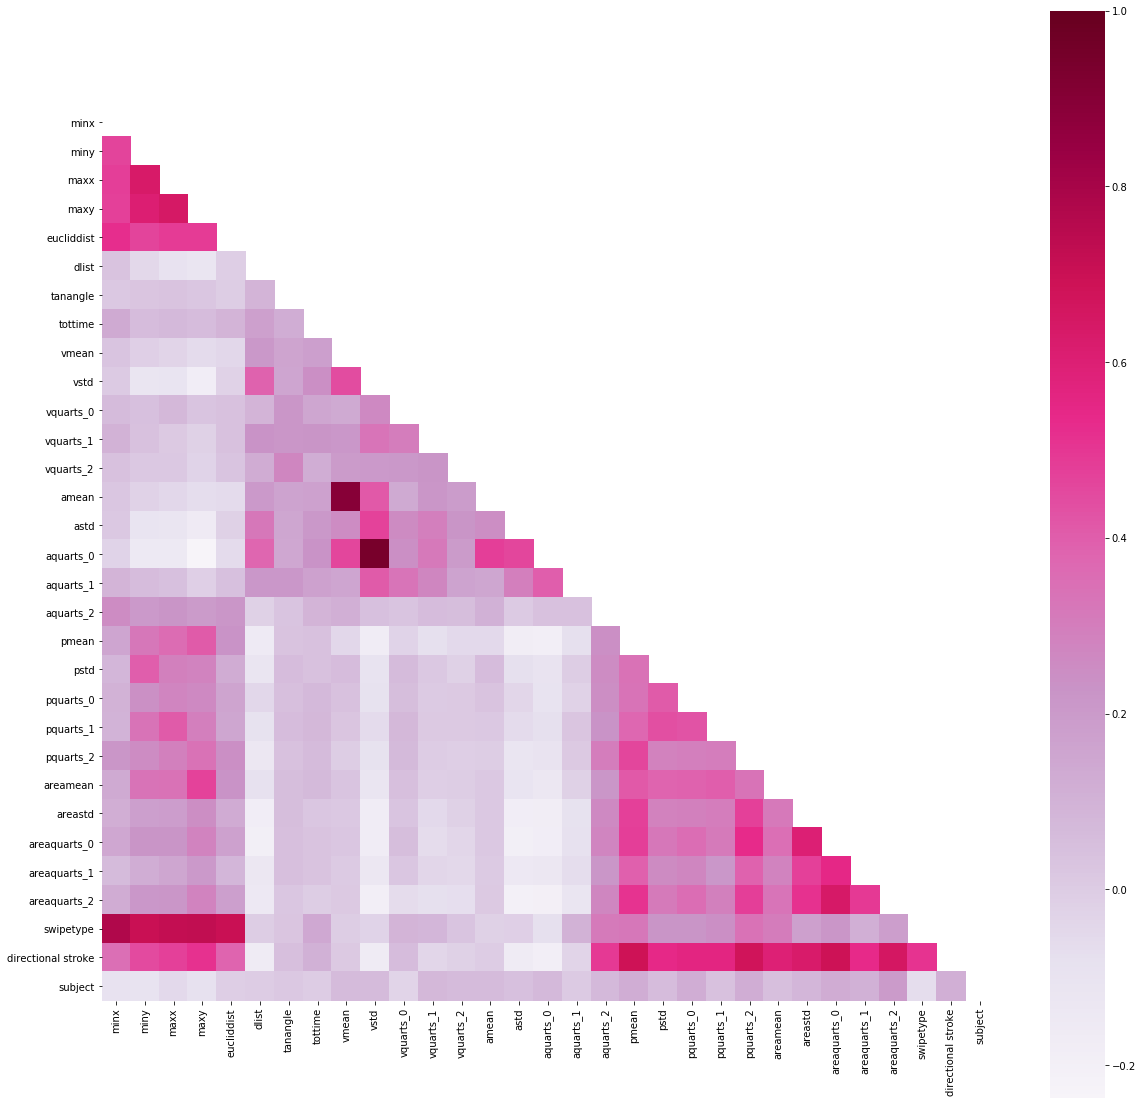

In [7]:
plt.figure(figsize=(20,20))
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True,cmap="PuRd")
plt.savefig('hm.png',bbox_inches='tight')

In [8]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [19]:
data = pd.read_csv("SWIPES.csv")
X = data.drop(["subject"],axis =1)
y = data["subject"]
data.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((17920, 30), (17920,), (4480, 30), (4480,))

In [20]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=100)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_train_forest = forest.predict(X_train)
pre = forest.predict(X_test)

In [25]:
feature_imp = pd.Series(forest.feature_importances_,index=data.columns[0:30]).sort_values(ascending=False)
print(feature_imp)

swipetype             0.096207
directional stroke    0.061051
tottime               0.055830
dlist                 0.047642
aquarts_1             0.046633
vquarts_0             0.043745
pquarts_1             0.041001
astd                  0.040514
amean                 0.040005
vquarts_1             0.039504
vmean                 0.035680
vquarts_2             0.035653
aquarts_0             0.034318
vstd                  0.033019
maxy                  0.032854
tanangle              0.029299
areamean              0.028472
pstd                  0.027181
minx                  0.025265
areaquarts_0          0.024767
pquarts_0             0.023121
areaquarts_2          0.022618
miny                  0.020959
maxx                  0.020758
pmean                 0.020125
pquarts_2             0.018256
eucliddist            0.018047
areastd               0.013820
areaquarts_1          0.013153
aquarts_2             0.010504
dtype: float64


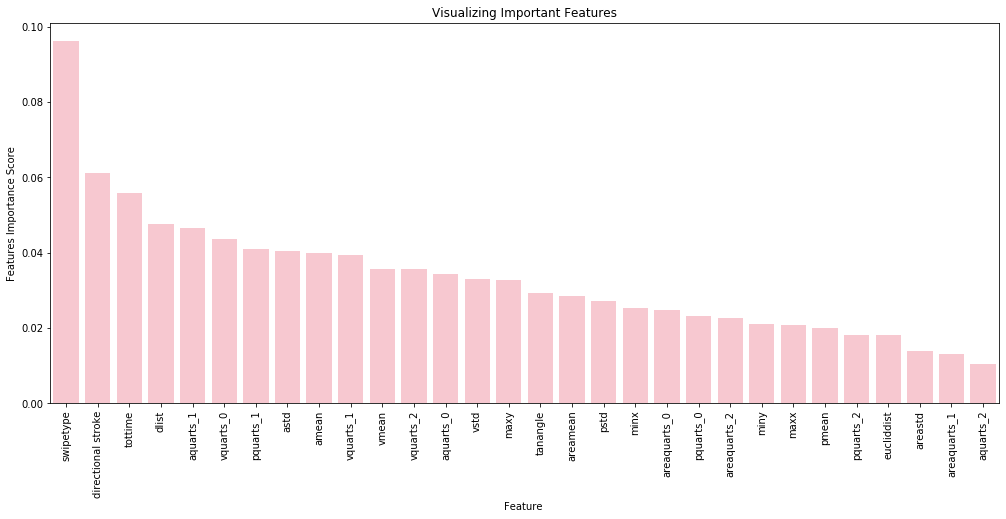

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt1
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt1.figure(figsize=(17,7))
co = ['pink']

#imp_df.columns = ['feature', 'feature_importance']

sns.barplot(x=feature_imp.index, y=feature_imp,palette=co)
# Add labels to your graph
plt1.xlabel('Feature ')
plt1.ylabel('Features Importance Score')
plt1.title("Visualizing Important Features")
plt1.xticks(rotation=90)
plt1.show()
plt1.savefig('w.png')

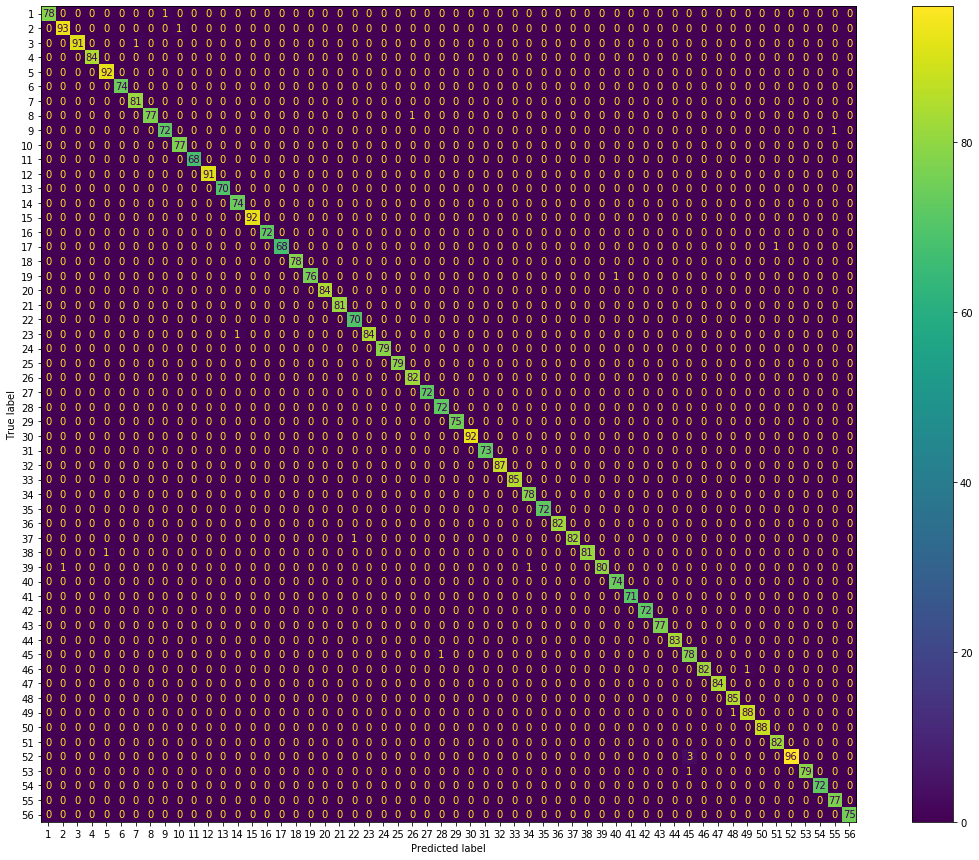

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pre, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
fig, ax = plt.subplots(figsize=(20,15))
disp.plot(ax=ax)
plt.savefig('cm1.jpeg')
plt.show()
